**Question 1**

In [1]:
def check_word_frequency(text):
    #convert the text to lower and split it
    lst_check = text.lower().split()
    #calculate the word frequency
    word_freq_dict = {word : lst_check.count(word) for word in lst_check}
    #Fetch all the maximum word frequencies
    Key_max = [k for k, v in word_freq_dict.items() if v == max(word_freq_dict.values())] 
    return f"The most frequent word is {max(Key_max,key = len)} and its length is {len(max(Key_max,key = len))}"

In [2]:
def test_check_word_frequency():
    #checking test case 1
    assert check_word_frequency("Write write write all the number from from from 1 to 100") == 'The most frequent word is write and its length is 5', "Test case1 failed"
    #checking test case 2
    assert check_word_frequency("Write write all the number from from from 1 to 100") == 'The most frequent word is from and its length is 4', "Test case2 failed"
    
if __name__ == "__main__":
    #Calling test_check_word_frequency function
    test_check_word_frequency()
    print("Everything passed")

Everything passed


In the first test case, the string passed is "Write write write all the number from from from 1 to 100". In this case both 'write' and 'from' is occuring same number of times but write is having length 5 and from is having length 4. So it should return "The most frequent word is write and its length is 5".

But in the 2nd test case, write is appearing twice but from is occuring 3 times. so it has returned "The most frequent word is from and its length is 4".

**Question 2: -**

In [3]:
from collections import Counter

def is_valid(text):
    #count the characters and convert into dictionary
    ctr = Counter(text)
    #count the values of dictionary
    val_cnt = Counter(list(ctr.values()))
    #check if value count is 1 - meaning all characters are equally present
    if(len(val_cnt) == 1):
        return "Yes"
    #check if value count is 2 and minimum of value count is 1
    elif(len(val_cnt) == 2 and min(val_cnt.values()) == 1):
        return "Yes"
    return "No"

In [4]:
def test_is_valid():
    #checking test case 1
    assert is_valid("abc") == 'Yes', "Test case1 failed"
    #checking test case 2
    assert is_valid("abcbc") == 'Yes', "Test case2 failed"
    #checking test case 3
    assert is_valid("abccdd") == 'No', "Test case3 failed"
    #checking test case 4
    assert is_valid("aabbbcc") == 'Yes', "Test case4 failed"
    
if __name__ == "__main__":
    test_is_valid()
    print("Everything passed")

Everything passed


In the first test case, the string passed is "abc". In this case all characters are equally present so it has returned "Yes".

In the second test case, the string passed is "abcbc". In this case all characters are not equally present but if "a" removed then remaining characters are equally present so it has returned "Yes".

In the third test case, the string passed is "abccdd". In this case all characters are not equally present but if "a" alone removed then also remaining characters are not equally present if "b" alone removed then also remaining characters are not equally present so it has returned "No".

**Question 3: -**

In [5]:
import pandas as pd
import requests
import re

# URL of the JSON data
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Send a GET request to the URL and retrieve the JSON data
response = requests.get(url)
data = response.json()

# Extract the required data attributes from the JSON data
pokemon_data = []
count = 0
#Lambda function to convert string to float
convert_to_float = lambda s: float(re.sub('[a-zA-Z\s]', '', s)) if re.sub('[a-zA-Z\s]', '', s).isdigit() else None

#Loop thorough the data

for pokemon in data["pokemon"]:
    pokemon_info = {
        "id": int(pokemon["id"]),
        "num": int(pokemon["num"]),
        "name": pokemon["name"],
        "img": pokemon["img"],
        "type": ", ".join(pokemon["type"]),
        "height": float(re.sub('[a-zA-Z\s]', '',pokemon["height"])),
        "weight": float(re.sub('[a-zA-Z\s]', '',pokemon["weight"])),
        "candy": pokemon["candy"],
        "candy_count": pokemon.get("candy_count"),
        "egg": convert_to_float(pokemon["egg"]),
        "spawn_chance":pokemon["spawn_chance"],
        "avg_spawns":pokemon["avg_spawns"],
        "spawn_time":pokemon["spawn_time"],
        "multipliers":pokemon["multipliers"],
        "weaknesses":pokemon["weaknesses"],
        "next_evolution":pokemon.get("next_evolution"),
        "prev_evolution":pokemon.get("prev_evolution")
        
    }
    pokemon_data.append(pokemon_info)
    
#Create Dataframe
df = pd.DataFrame(pokemon_data)
df['avg_spawns'] = df['avg_spawns'].astype('int')

#convert to excel
df.to_excel("JSON_to_Excel.xlsx",index=False)


**Question 4 -**

In [6]:
import pandas as pd
import requests
import re
from datetime import datetime

# URL of the JSON data
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to the URL and retrieve the JSON data

response = requests.get(url)
data = response.json()
nasa_data = []
#Loop through data

for row in data:
    nasa_info = {
        "Name of Earth Meteorite":row['name'],
        "ID of Earth Meteorite" : int(row['id']),
        "nametype":row['nametype'],
        "recclass": row['recclass'],
        "mass" : float(row.get('mass')) if 'mass' in row else None,
        "year" : datetime.strptime(row.get('year'), '%Y-%m-%dT%H:%M:%S.%f') if 'year' in row else datetime.min,
        "reclat" : float(row.get('reclat')) if 'reclat' in row else None,
        "reclong" : float(row.get('reclong')) if 'reclong' in row else None,
        "type" : row.get('geolocation').get('type') if 'geolocation' in row and 'type' in row.get('geolocation') else '',
        "coordinates" : row.get('geolocation').get('coordinates') if 'geolocation' in row and 'coordinates' in row.get('geolocation') else ''
    }
    #Append to the list to convert to dataframe later
    nasa_data.append(nasa_info)

#Create Dataframe
df_nasa = pd.DataFrame(nasa_data)

#convert to csv with utf-8 encoding
df_nasa.to_csv("JSON_to_CSV.csv",index=False,encoding = 'utf-8')

**Question 5 -**

In [7]:
import pandas as pd
import requests
import re
from datetime import datetime
from dateutil.parser import parse

# URL of the JSON data
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the URL and retrieve the JSON data

response = requests.get(url)
data = response.json()

#Drill down to '_embedded' to get the episodes
embedded_data = data['_embedded']

tvmaze_data = []

#Loop through the data
for episode in embedded_data["episodes"]:
    tvmaze_info = {
        "id":episode['id'],
        "url": episode['url'],
        "name":episode['name'],
        "season" : episode['season'],
        "number" : episode['number'],
        "type" : episode['type'],
        "airdate" : datetime.strptime(episode['airdate'], '%Y-%m-%d') if 'airdate' in episode else datetime.min,
        "airtime" : parse(episode['airtime']).strftime("%Y-%m-%d %I:%M:%S %p") if 'airtime' in episode and episode['airtime'] else datetime.min,
        "runtime" : float(episode.get('runtime')) if 'runtime' in episode else None,
        "average_rating" : float(episode.get('rating').get('average')) if 'rating' in episode and 'average' in episode.get('rating') else None,
        "summary" : re.sub('<[^<]+?>', '', episode.get('summary', '')),
        "medium_image_links" : episode.get('image').get('medium') if 'image' in episode and 'medium' in episode.get('image') else '',
        "original_image_links" : episode.get('image').get('original') if 'image' in episode and 'original' in episode.get('image') else ''
        
    }

    #Append to the list to convert to dataframe later
    tvmaze_data.append(tvmaze_info)

#Create Dataframe
df_tvmaze = pd.DataFrame(tvmaze_data)

#convert to csv with utf-8 encoding
df_tvmaze.to_csv("JSON_to_CSV_tvmaze.csv",index=False,encoding = 'utf-8')

**Question 6 -**

● Get all Pokemons whose spawn rate is less than 5%

In [8]:
#import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'Pokemons whose spawn rate is less than 5%')

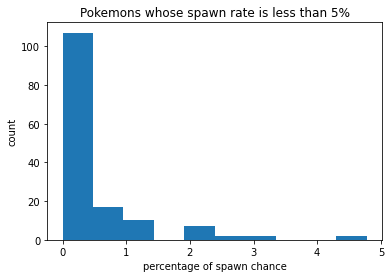

In [9]:
#Filter spawn_chance less than 5 and plotting it with histograms

plt.hist(df.loc[df['spawn_chance'] < 5,'spawn_chance'])

# Customize the plot
plt.xlabel("percentage of spawn chance")
plt.ylabel("count")
plt.title("Pokemons whose spawn rate is less than 5%")

● Get all Pokemons that have less than 4 weaknesses

In [10]:
#Create a new column for weeknesses count

df['weeknesses_count'] = df['weaknesses'].apply(lambda x : len(x))

Text(0.5, 1.0, 'Pokemons that have less than 4 weaknesses')

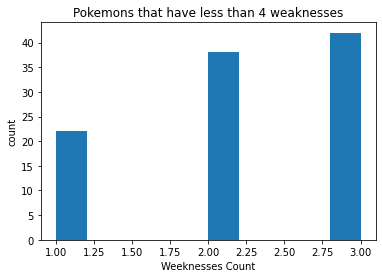

In [11]:
#Filter weeknesses_count less than 4 and plotting it with histograms

plt.hist(df.loc[df['weeknesses_count'] < 4,'weeknesses_count'])

# Customize the plot
plt.xlabel("Weeknesses Count")
plt.ylabel("count")
plt.title("Pokemons that have less than 4 weaknesses")

● Get all Pokemons that have no multipliers at all

In [12]:
# Filtering pokemons that have no multipliers
df.loc[df['multipliers'].isnull(),'name']

2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

Text(0.5, 1.0, 'Quantifying missing data')

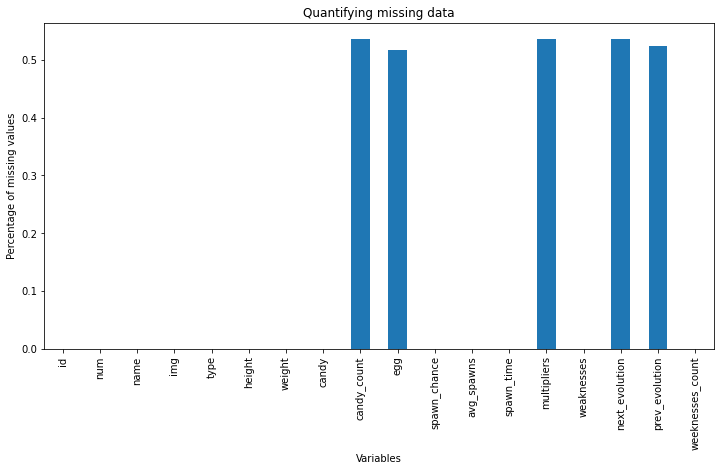

In [13]:
#Quantifying the null values across the dataframe

df.isnull().mean().plot.bar(figsize=(12,6))

# Customize the plot
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

● Get all Pokemons that do not have more than 2 evolutions

In [14]:
df.head()

id  num        name                                               img  \
0   1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1   2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2   3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3   4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4   5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   

            type  height  weight             candy  candy_count  egg  \
0  Grass, Poison    0.71     6.9   Bulbasaur Candy         25.0  2.0   
1  Grass, Poison    0.99    13.0   Bulbasaur Candy        100.0  NaN   
2  Grass, Poison    2.01   100.0   Bulbasaur Candy          NaN  NaN   
3           Fire    0.61     8.5  Charmander Candy         25.0  2.0   
4           Fire    1.09    19.0  Charmander Candy        100.0  NaN   

   spawn_chance  avg_spawns spawn_time multipliers  \
0         0.690          69      20:00      [1.58]   
1         0.042           4      07:00  [1.2, 1.6]   
2         0.017           1      11:30        None   
3         0.253          25      08:45      [1.65]   
4         0.012           1      19:00      [1.79]   

                     weaknesses  \
0  [Fire, Ice, Flying, Psychic]   
1  [Fire, Ice, Flying, Psychic]   
2  [Fire, Ice, Flying, Psychic]   
3         [Water, Ground, Rock]   
4         [Water, Ground, Rock]   

                                      next_evolution  \
0  [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...   
1               [{'num': '003', 'name': 'Venusaur'}]   
2                                               None   
3  [{'num': '005', 'name': 'Charmeleon'}, {'num':...   
4              [{'num': '006', 'name': 'Charizard'}]   

                                      prev_evolution  weeknesses_count  
0                                               None                 4  
1              [{'num': '001', 'name': 'Bulbasaur'}]                 4  
2  [{'num': '001', 'name': 'Bulbasaur'}, {'num': ...                 4  
3                                               None                 3  
4             [{'num': '004', 'name': 'Charmander'}]                 3

In [15]:
#Create a new column for next_evolution count
df['next_evolution_count'] = df['next_evolution'].apply(lambda x : len(x) if x is not None else x)

Text(0.5, 1.0, 'Pokemons that do not have more than 2 evolutions')

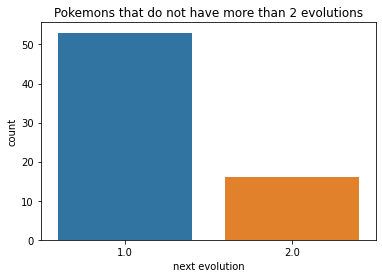

In [16]:
#Plot the next evolution count which are less then 2
sns.countplot(x='next_evolution_count',data = df[df['next_evolution_count'] <= 2])

# Customize the plot
plt.ylabel('count')
plt.xlabel('next evolution')
plt.title('Pokemons that do not have more than 2 evolutions')

● Get all Pokemons whose spawn time is less than 300 seconds.

In [17]:
#Define a function to convert to seconds

def convert_to_seconds(text):
    #check if text is not 'N/A'
    if text != 'N/A':
        #Split the text with minutes and seconds
        minutes,seconds = text.split(":")
        
        #Type cast the minutes and seconds
        minutes = int(minutes)
        seconds = int(seconds)
        
        #if minutes > 0
        if minutes:
            #seconds will be added to minutes multiplied by 60
            seconds = seconds + minutes * 60
        return seconds
    return 0

#Applying the above function to 'spawn_time'
df['spawn_time_seconds'] = df['spawn_time'].apply(lambda x : convert_to_seconds(x))

Text(0.5, 1.0, 'Pokemons whose spawn time is less than 300 seconds.')

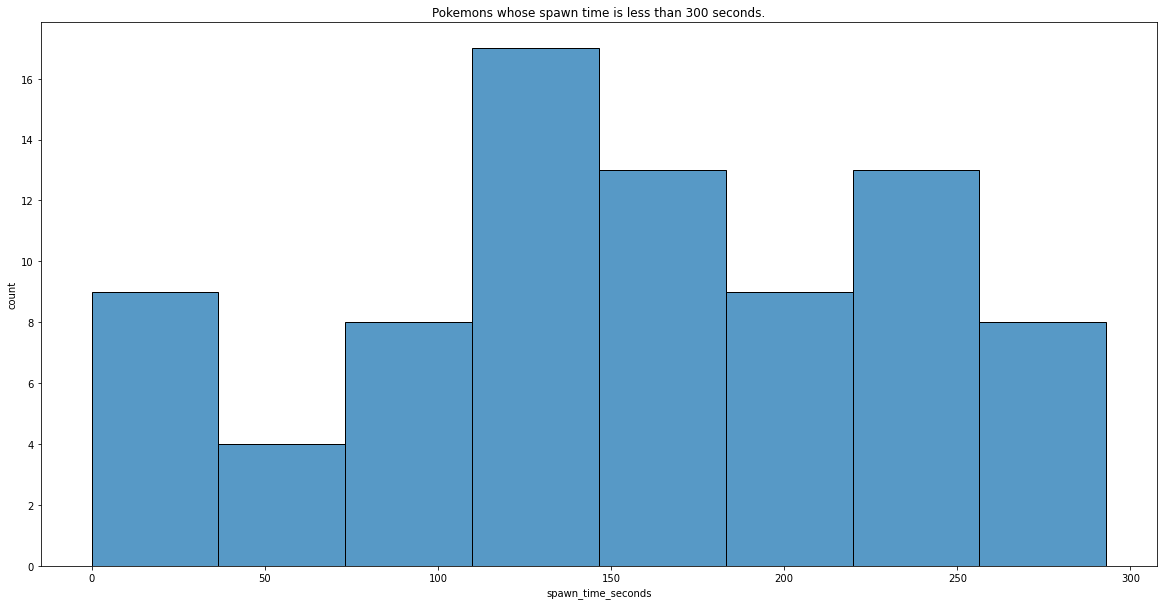

In [18]:
plt.figure(figsize = (20,10))

#plot the spawn_time less than 300 seconds
sns.histplot(x='spawn_time_seconds',data = df[df['spawn_time_seconds'] <= 300])

# Customize the plot
plt.ylabel('count')
plt.xlabel('spawn_time_seconds')
plt.title('Pokemons whose spawn time is less than 300 seconds.')

In [19]:
df['spawn_time_seconds'].value_counts()

0       6
111     4
1420    4
736     2
240     2
       ..
142     1
151     1
82      1
102     1
1418    1
Name: spawn_time_seconds, Length: 126, dtype: int64

● Get all Pokemon who have more than two types of capabilities

In [20]:
def count_type(text):
    if ',' in text:
        lst1 = text.split(",")
        return len(lst1)
    return 1

In [21]:
df['type_count'] = df['type'].apply(lambda x : count_type(x))

In [22]:
df['type_count'].unique()

array([2, 1], dtype=int64)

In [23]:
# There is nothing more than 2

**Question 7 -**

● Get all the Earth meteorites that fell before the year 2000

In [24]:
df_nasa.head()

Name of Earth Meteorite  ID of Earth Meteorite nametype     recclass  \
0                  Aachen                      1    Valid           L5   
1                  Aarhus                      2    Valid           H6   
2                    Abee                      6    Valid          EH4   
3                Acapulco                     10    Valid  Acapulcoite   
4                 Achiras                    370    Valid           L6   

       mass                 year    reclat    reclong   type  \
0      21.0  1880-01-01 00:00:00  50.77500    6.08333  Point   
1     720.0  1951-01-01 00:00:00  56.18333   10.23333  Point   
2  107000.0  1952-01-01 00:00:00  54.21667 -113.00000  Point   
3    1914.0  1976-01-01 00:00:00  16.88333  -99.90000  Point   
4     780.0  1902-01-01 00:00:00 -33.16667  -64.95000  Point   

            coordinates  
0     [6.08333, 50.775]  
1  [10.23333, 56.18333]  
2      [-113, 54.21667]  
3     [-99.9, 16.88333]  
4   [-64.95, -33.16667]

In [25]:
df_nasa['year_new'] = pd.to_datetime(df_nasa['year'], errors='coerce').dt.year.astype(pd.Int64Dtype())

<AxesSubplot:xlabel='year_new', ylabel='Count'>

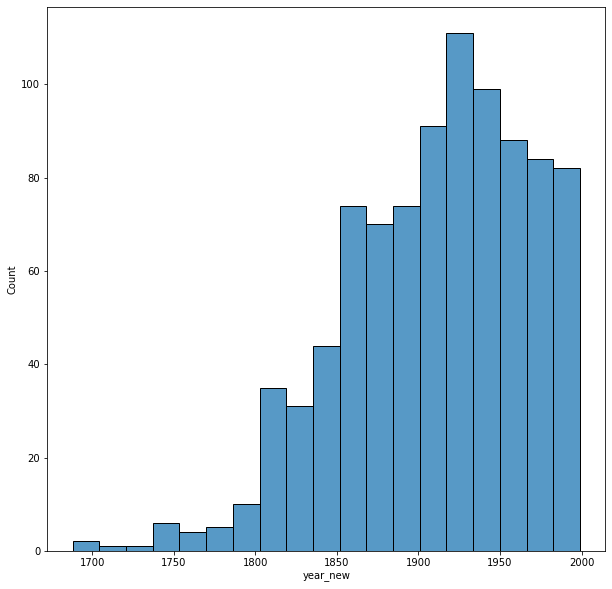

In [26]:
plt.figure(figsize = (10,10))
sns.histplot(x='year_new',data = df_nasa[df_nasa['year_new'] < 2000])

● Get all the earth meteorites co-ordinates who fell before the year 1970

In [27]:
import plotly.express as px

In [28]:
df_before_1970 = df_nasa[df_nasa['year_new'] < 1970]

In [29]:
# Create a scatter plot on a map
fig = px.scatter_mapbox(df_before_1970, lat="reclat", lon="reclong", hover_name="Name of Earth Meteorite",
                        color_discrete_sequence=["red"], zoom=2)

# Customize the map layout
fig.update_layout(mapbox_style="carto-positron",
                  margin={"r": 0, "t": 0, "l": 0, "b": 0},
                  width=800, height=500)

# Display the plot
fig.show()

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

Text(0.5, 1.0, 'mass was more than 10000kg')

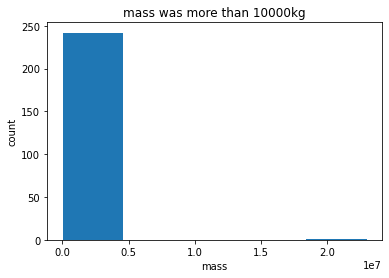

In [30]:
plt.hist(df_nasa.loc[df_nasa['mass'] > 10000,'mass'],bins = 5)
plt.xlabel("mass")
plt.ylabel("count")
plt.title("mass was more than 10000kg")

<AxesSubplot:xlabel='mass', ylabel='Count'>

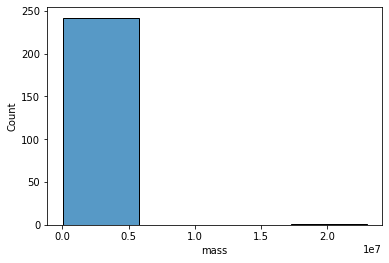

In [31]:
sns.histplot(data=df_nasa[df_nasa['mass'] > 10000], x="mass", bins=4)

**Question 8 -**

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

In [32]:
df_tvmaze.head()

id                                                url  \
0  869671  https://www.tvmaze.com/episodes/869671/westwor...   
1  911201  https://www.tvmaze.com/episodes/911201/westwor...   
2  911204  https://www.tvmaze.com/episodes/911204/westwor...   
3  911205  https://www.tvmaze.com/episodes/911205/westwor...   
4  927174  https://www.tvmaze.com/episodes/927174/westwor...   

                name  season  number     type    airdate  \
0       The Original       1       1  regular 2016-10-02   
1           Chestnut       1       2  regular 2016-10-09   
2          The Stray       1       3  regular 2016-10-16   
3  Dissonance Theory       1       4  regular 2016-10-23   
4        Contrapasso       1       5  regular 2016-10-30   

                  airtime  runtime  average_rating  \
0  2023-05-24 09:00:00 PM     68.0             8.0   
1  2023-05-24 09:00:00 PM     60.0             7.7   
2  2023-05-24 09:00:00 PM     60.0             7.6   
3  2023-05-24 09:00:00 PM     60.0             7.9   
4  2023-05-24 09:00:00 PM     60.0             8.0   

                                             summary  \
0  A woman named Dolores is a free spirit in the ...   
1  Bernard suspects that someone is sabotaging th...   
2  Bernard continues to investigate Dolores' supp...   
3  While Dolores joins William and Logan on their...   
4  Dolores takes the first step on her path of di...   

                                  medium_image_links  \
0  https://static.tvmaze.com/uploads/images/mediu...   
1  https://static.tvmaze.com/uploads/images/mediu...   
2  https://static.tvmaze.com/uploads/images/mediu...   
3  https://static.tvmaze.com/uploads/images/mediu...   
4  https://static.tvmaze.com/uploads/images/mediu...   

                                original_image_links  
0  https://static.tvmaze.com/uploads/images/origi...  
1  https://static.tvmaze.com/uploads/images/origi...  
2  https://static.tvmaze.com/uploads/images/origi...  
3  https://static.tvmaze.com/uploads/images/origi...  
4  https://static.tvmaze.com/uploads/images/origi...

In [33]:
df_tvmaze['season'].unique()

array([1, 2, 3, 4], dtype=int64)

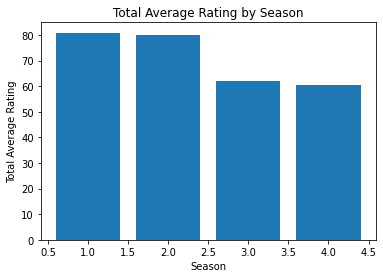

In [34]:
# Group the data by season and calculate the sum of average ratings
season_rating_sum = df_tvmaze.groupby('season')['average_rating'].sum()

# Plot the data as a bar plot
plt.bar(season_rating_sum.index, season_rating_sum.values)
plt.xlabel('Season')
plt.ylabel('Total Average Rating')
plt.title('Total Average Rating by Season')
plt.show()

● Get all the episode names, whose average rating is more than 8 for every season

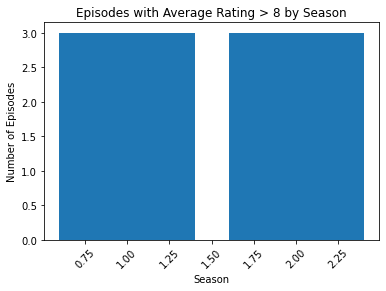

In [35]:
# Filter the episodes with average rating more than 8
high_rated_episodes = df_tvmaze[df_tvmaze['average_rating'] > 8]

# Group the high-rated episodes by season and count the number of episodes
season_episode_count = high_rated_episodes.groupby('season')['name'].count()

# Create a bar chart
plt.bar(season_episode_count.index, season_episode_count.values)

# Customize the plot
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.title('Episodes with Average Rating > 8 by Season')
plt.xticks(rotation=45)

# Display the plot
plt.show()

● Get all the episode names that aired before May 2019

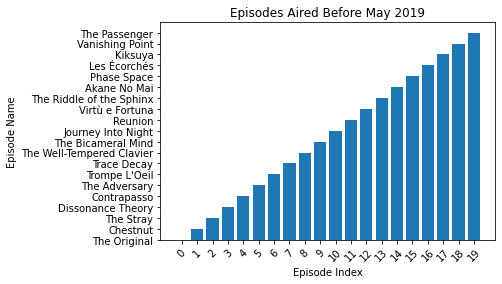

In [36]:
# Filter the episodes that aired before May 2019
filtered_episodes = df_tvmaze[df_tvmaze['airdate'] < '2019-05-01']

# Get the episode names
episode_names = filtered_episodes['name']

# Create a bar chart
plt.bar(range(len(episode_names)), episode_names)

# Customize the plot
plt.xlabel('Episode Index')
plt.ylabel('Episode Name')
plt.title('Episodes Aired Before May 2019')

# Adjust the x-axis tick labels if needed
plt.xticks(range(len(episode_names)), rotation=45)

# Display the plot
plt.show()

● Get the episode name from each season with the highest and lowest rating

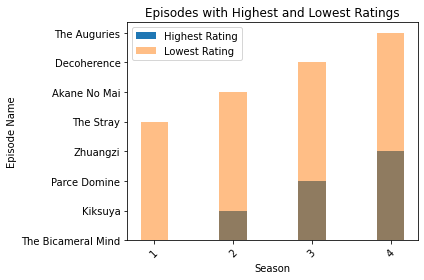

In [37]:
# Group the DataFrame by season and find the episode with the highest and lowest rating
highest_rating = df_tvmaze.groupby('season')['average_rating'].idxmax()
lowest_rating = df_tvmaze.groupby('season')['average_rating'].idxmin()

# Get the episode names with the highest and lowest ratings
highest_episode_names = df_tvmaze.loc[highest_rating, 'name']
lowest_episode_names = df_tvmaze.loc[lowest_rating, 'name']

# Get the seasons
seasons = df_tvmaze['season'].unique()

# Create a grouped bar chart
bar_width = 0.35
index = range(len(seasons))
plt.bar(index, highest_episode_names, bar_width, label='Highest Rating')
plt.bar(index, lowest_episode_names, bar_width, label='Lowest Rating', alpha=0.5)

# Customize the plot
plt.xlabel('Season')
plt.ylabel('Episode Name')
plt.title('Episodes with Highest and Lowest Ratings')
plt.xticks(index, seasons, rotation=45)
plt.legend()

# Adjust the plot layout if needed
plt.tight_layout()

# Display the plot
plt.show()

● Get the summary for the most popular ( ratings ) episode in every season

In [38]:
# Group the DataFrame by season and find the index of the highest-rated episode in each season
most_popular_index = df_tvmaze.groupby('season')['average_rating'].idxmax()

# Get the summary for the most popular episode in every season
most_popular_episodes = df_tvmaze.loc[most_popular_index, ['season', 'name', 'average_rating']]

# Display the summary
print(most_popular_episodes)

    season                name  average_rating
9        1  The Bicameral Mind             8.7
17       2             Kiksuya             8.7
20       3        Parce Domine             8.0
32       4            Zhuangzi             7.8


**Question 9 -**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data_url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df_cars = pd.read_csv(data_url)

In [40]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df_cars[df_cars['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isna()][['Make', 'Model']]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(non_clean_fuel_cars)
print("-"*100)
# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_bothell_cars = df_cars[(df_cars['Make'] == 'TESLA') & (df_cars['City'] == 'Bothell')]['Model Year']
print("\nTESLA cars made in Bothell City:")
print(tesla_bothell_cars)
print("-"*100)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_gt_100_range = df_cars[(df_cars['Electric Range'] > 100) & (df_cars['Model Year'] > 2015)][['Make', 'Model', 'Electric Range']]
print("\nCars with electric range > 100 and made after 2015:")
print(electric_cars_gt_100_range)
print("-"*100)

Cars that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []
----------------------------------------------------------------------------------------------------

TESLA cars made in Bothell City:
39        2020
217       2022
218       2022
222       2018
292       2017
          ... 
129778    2019
129954    2021
129976    2014
130295    2022
130392    2018
Name: Model Year, Length: 2407, dtype: int64
----------------------------------------------------------------------------------------------------

Cars with electric range > 100 and made after 2015:
          Make    Model  Electric Range
0        TESLA  MODEL X             238
2        TESLA  MODEL 3             220
4        TESLA  MODEL S             210
12       TESLA  MODEL 3             308
13       TESLA  MODEL 3             322
...        ...      ...             ...
130417   TESLA  MODEL Y             291
130428  NISSAN     LEAF             151
130432   TESLA  MODEL Y        

C:\Users\vr19\AppData\Local\Temp\ipykernel_4944\2519511495.py:25: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



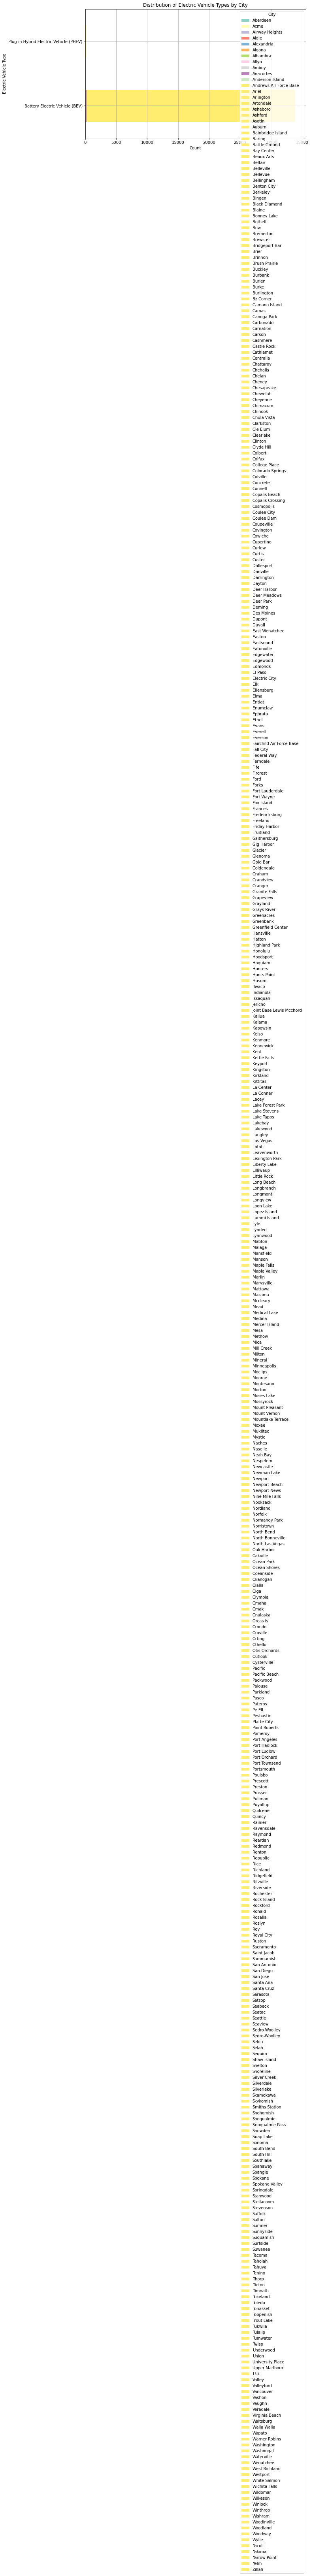

In [42]:
# Filter the data for electric vehicles with a range greater than 100 and made after 2015
filtered_df = df_cars[(df_cars['Electric Range'] > 100) & (df_cars['Model Year'] > 2015)]

# Group the data by city and electric vehicle type and count the occurrences
grouped_data = filtered_df.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)

# Transpose the grouped_data DataFrame
grouped_data = grouped_data.transpose()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked horizontal bar chart
colors = plt.cm.Set3(range(len(grouped_data.columns)))
grouped_data.plot.barh(stacked=True, color=colors, ax=ax)

# Customize the plot
ax.set_title('Distribution of Electric Vehicle Types by City')
ax.set_xlabel('Count')
ax.set_ylabel('Electric Vehicle Type')
ax.legend(title='City')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Question 10 -**

In [43]:
import nltk
nltk.download('averaged_perceptron_tagger')


def count_pos(phrase):
    # Tokenize the phrase into words
    words = nltk.word_tokenize(phrase)

    # Perform POS tagging on the words
    pos_tags = nltk.pos_tag(words)

    # Initialize the counts for each category
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Iterate over each word and its POS tag
    for word, pos_tag in pos_tags:
        # Check if the POS tag belongs to any category
        if pos_tag.startswith('VB'):
            verb_count += 1
        elif pos_tag.startswith('NN'):
            noun_count += 1
        elif pos_tag.startswith('PRP'):
            pronoun_count += 1
        elif pos_tag.startswith('JJ'):
            adjective_count += 1

    # Return the counts as a dictionary
    counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }

    return counts

# Test the function with example phrases
phrase1 = "The cat is sitting on the mat."
phrase2 = "I love eating delicious pizza."
phrase3 = "She gave me a beautiful flower."

# Count the parts of speech in each phrase
counts1 = count_pos(phrase1)
counts2 = count_pos(phrase2)
counts3 = count_pos(phrase3)

# Print the results
print("Phrase 1 counts:", counts1)
print("Phrase 2 counts:", counts2)
print("Phrase 3 counts:", counts3)

Phrase 1 counts: {'Verbs': 2, 'Nouns': 2, 'Pronouns': 0, 'Adjectives': 0}
Phrase 2 counts: {'Verbs': 2, 'Nouns': 1, 'Pronouns': 1, 'Adjectives': 1}
Phrase 3 counts: {'Verbs': 1, 'Nouns': 1, 'Pronouns': 2, 'Adjectives': 1}


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vr19\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## **Statistics**

**Q3**

**b. Calculate mean and 5% confidence interval and plot it in a graph**

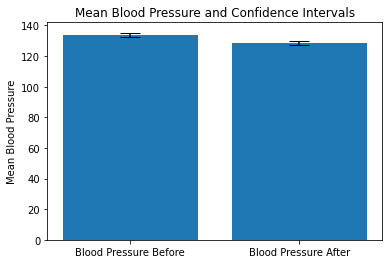

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Mean values
mean_before = 133.91
mean_after = 128.36

# Sample sizes
n_before = 100
n_after = 100

# Standard deviations
std_before = 6.565
std_after = 6.85

# Calculate standard error of the mean (SEM)
sem_before = std_before / np.sqrt(n_before)
sem_after = std_after / np.sqrt(n_after)

# Calculate margin of error (MOE) for 5% confidence level (two-tailed)
z_critical = 1.96  # For 95% confidence interval
moe_before = z_critical * sem_before
moe_after = z_critical * sem_after

# Calculate confidence interval bounds
ci_lower_before = mean_before - moe_before
ci_upper_before = mean_before + moe_before
ci_lower_after = mean_after - moe_after
ci_upper_after = mean_after + moe_after

# Plotting the mean and confidence intervals
labels = ['Blood Pressure Before', 'Blood Pressure After']
mean_values = [mean_before, mean_after]
ci_lower_values = [ci_lower_before, ci_lower_after]
ci_upper_values = [ci_upper_before, ci_upper_after]

plt.bar(labels, mean_values, yerr=[(mean_before - ci_lower_before, ci_upper_before - mean_before),
                                   (mean_after - ci_lower_after, ci_upper_after - mean_after)],
        capsize=10)
plt.ylabel('Mean Blood Pressure')
plt.title('Mean Blood Pressure and Confidence Intervals')
plt.show()

**Q6**

In [45]:
from scipy import stats

change_before = [130, 142, 120, 135, 148, 122, 137, 130, 142, 128, 135, 140, 132,
       145, 124, 128, 136, 143, 127, 139, 135, 131, 127, 130, 142, 128,
       136, 140, 132, 145, 124, 128, 136, 143, 127, 139, 135, 131, 127,
       130, 142, 128, 136, 140, 132, 145, 124, 128, 136, 143, 127, 139,
       135, 131, 127, 130, 142, 128, 136, 140, 132, 145, 124, 128, 136,
       143, 127, 139, 135, 131, 127, 130, 142, 128, 136, 140, 132, 145,
       124, 128, 136, 143, 127, 139, 135, 131, 127, 130, 128, 136, 140,
       132, 145, 124, 128, 136, 143, 127, 139, 135]  # List of blood pressure change values before taking the drug
change_after = [120, 135, 118, 127, 140, 118, 129, 124, 137, 125, 129, 132, 125,
       136, 118, 122, 130, 139, 123, 132, 131, 126, 120, 123, 139, 122,
       129, 136, 127, 140, 119, 121, 129, 137, 122, 135, 129, 124, 119,
       124, 139, 123, 131, 135, 127, 141, 118, 121, 129, 137, 123, 135,
       130, 125, 121, 124, 139, 123, 131, 136, 127, 141, 118, 121, 129,
       137, 123, 135, 130, 124, 121, 124, 139, 123, 131, 136, 127, 141,
       118, 121, 129, 137, 123, 135, 130, 125, 121, 124, 122, 129, 135,
       127, 141, 118, 121, 129, 137, 123, 135, 130]   # List of blood pressure change values after taking the drug

# Perform Shapiro-Wilk test
stat_before, p_before = stats.shapiro(change_before)
stat_after, p_after = stats.shapiro(change_after)

# Print the results
print("Shapiro-Wilk Test - Blood Pressure Before: ")
print("Test Statistic =", stat_before)
print("p-value =", p_before)
print("-----------------------------------------")
print("Shapiro-Wilk Test - Blood Pressure After: ")
print("Test Statistic =", stat_after)
print("p-value =", p_after)

Shapiro-Wilk Test - Blood Pressure Before: 
Test Statistic = 0.957322895526886
p-value = 0.0026030323933809996
-----------------------------------------
Shapiro-Wilk Test - Blood Pressure After: 
Test Statistic = 0.940056562423706
p-value = 0.0001943297975230962


In [46]:
if p_before > 0.05 and p_after > 0.05:
    print("Change in Blood pressure follows normal distribution")
else:
    print("Change in Blood pressure does not follows normal distribution")

Change in Blood pressure does not follows normal distribution


**Q9**

In [47]:
import numpy as np
from scipy.stats import f_oneway

# Prepare your data, 
exam_1_scores = [85, 70, 90, 75, 95]
exam_2_scores = [90, 80, 85, 70, 92]
exam_3_scores = [92, 85, 88, 75, 96]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(exam_1_scores, exam_2_scores, exam_3_scores)

# Interpret the result
if p_value < 0.05:
    print("There is a significant difference in the mean scores among the groups.")
else:
    print("There is no significant difference in the mean scores among the groups.")


There is no significant difference in the mean scores among the groups.


**Q8-**

In [49]:
from scipy.stats import wilcoxon

# Define the data
before_therapy = [10,8,12,15,6,9,11,7,14,10]
after_therapy = [7,6,10,12,5,8,9,6,12,8]

# Calculate the differences
differences = [after - before for before, after in zip(before_therapy, after_therapy)]

# Perform the Wilcoxon signed-rank test
statistic, p_value = wilcoxon(differences)

# Print the test results
print("Wilcoxon signed-rank test results:")
print("Statistic:", statistic)
print("p-value:", p_value)

Wilcoxon signed-rank test results:
Statistic: 0.0
p-value: 0.001953125


**Q12-**

In [50]:
from scipy.stats import t

# Define the sample sizes, mean improvement scores, and standard deviations for each group
sample_size_A = 30
mean_A = 2.5
std_dev_A = 0.8

sample_size_B = 30
mean_B = 2.2
std_dev_B = 0.6

# Calculate the degrees of freedom for the t-test
degrees_of_freedom = sample_size_A + sample_size_B - 2

# Calculate the pooled standard deviation
pooled_std_dev = ((sample_size_A - 1) * std_dev_A ** 2 + (sample_size_B - 1) * std_dev_B ** 2) / degrees_of_freedom
pooled_std_dev = pooled_std_dev ** 0.5

# Calculate the t-statistic
t_statistic = (mean_A - mean_B) / (pooled_std_dev * (1 / sample_size_A + 1 / sample_size_B) ** 0.5)

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

# Define the significance level
significance_level = 0.05

# Print the t-test results
print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("p-value:", p_value)

# Determine if the null hypothesis should be rejected
if p_value < significance_level:
    print("Null hypothesis rejected. There is a significant difference in the mean improvement scores between the two groups.")
else:
    print("Null hypothesis not rejected. There is no significant difference in the mean improvement scores between the two groups.")

T-Test Results:
T-Statistic: 1.6431676725154976
p-value: 0.10575916705583666
Null hypothesis not rejected. There is no significant difference in the mean improvement scores between the two groups.
